<a href="https://colab.research.google.com/github/honeydewsago/IndividualProject_Admin/blob/main/ResNet50Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/herb_images/train'
val_dir = '/content/drive/MyDrive/herb_images/val'
test_dir = '/content/drive/MyDrive/herb_images/test'

In [ ]:
import os

print("Files in train directory:")
print(os.listdir(train_dir))

print("Files in validation directory:")
print(os.listdir(val_dir))

print("Files in test directory:")
print(os.listdir(test_dir))

Files in train directory:
['chongcao', 'baihe', 'fuling', 'aiye', 'dangshen', 'huangbai', 'gancao', 'huangqi', 'gouqi', 'jinyinhua', 'shanyao', 'luohanguo', 'renshen', 'tiannanxing', 'heshouwu']
Files in validation directory:
['huangqi', 'dangshen', 'chongcao', 'heshouwu', 'gouqi', 'huangbai', 'gancao', 'fuling', 'aiye', 'baihe', 'luohanguo', 'shanyao', 'jinyinhua', 'tiannanxing', 'renshen']
Files in test directory:
['gancao', 'fuling', 'heshouwu', 'baihe', 'aiye', 'chongcao', 'gouqi', 'huangqi', 'huangbai', 'dangshen', 'renshen', 'shanyao', 'jinyinhua', 'luohanguo', 'tiannanxing']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with preprocessing and augmentation options
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,            # Normalize pixel values
    rotation_range=20,            # Random rotation up to 20 degrees
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shear transformations
    zoom_range=0.2,               # Random zoom-in or zoom-out
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest',          # Fill mode for pixel values outside the boundaries
    brightness_range=[0.7, 1.3],  # Random image brightness adjustment
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 3000 images belonging to 15 classes.
Found 375 images belonging to 15 classes.
Found 375 images belonging to 15 classes.


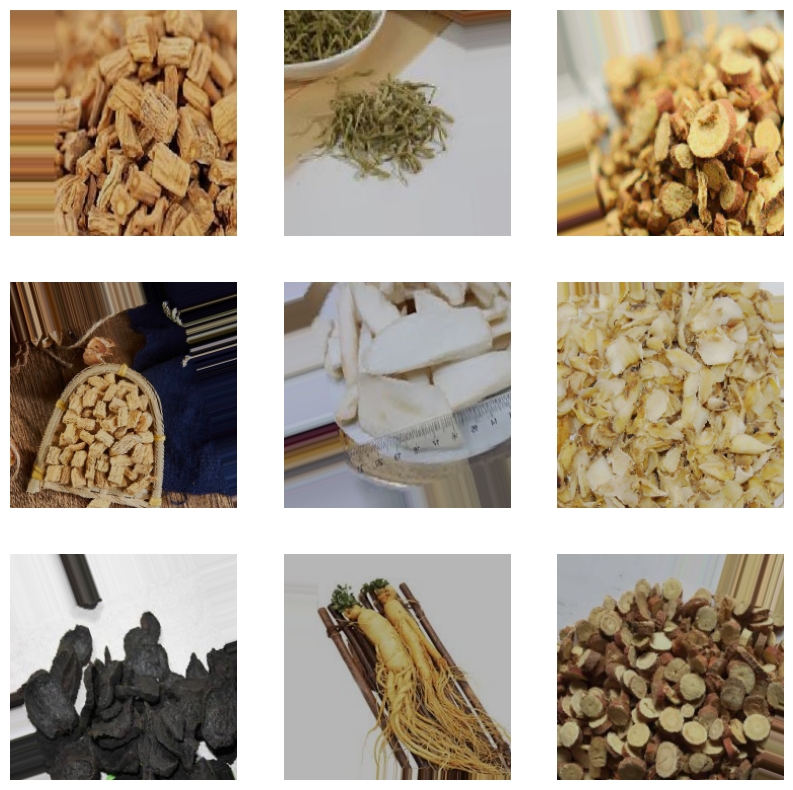

In [ ]:
# Visualize preprocessed images
import matplotlib.pyplot as plt

sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import time
from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained ResNet50 model (excluding the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
batch_size = 32
epochs = 10

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
base_model.summary()

In [ ]:
model.summary()

In [ ]:
# Fine Tuning 1
# Learning rate = 0.01

In [ ]:
# Fine Tuning 2
# Learning rate = 0.0001

In [ ]:
# Fine Tuning 3
# Optimizer = SGD
# Learing rate =

In [ ]:
# Fine Tuning 4
# Unfreeze last layers

In [ ]:
# Image accuracy not improving
# Use Keras Image Preprocess Input

In [ ]:
# Train from sratch

In [ ]:
# Training Final Model
# Learning Rate =
# Optimizer =
# Epoch = 50
# Freeze the pre-trained layers
# Unfreeze last layers

In [ ]:
# Export Model

In [ ]:
import tensorflow as tf

# Load the best model
best_model = tf.keras.models.load_model('resnet50_best_model.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('resnet50_model.tflite', 'wb') as f:
    f.write(tflite_model)